In [1]:
import pandas as pd

In [2]:
voting_record = pd.read_csv('2015parliament.csv', delimiter=',')

In [3]:
voting_record.head()

,mpid,name,constituency,party,32966,32965,32964,32958,32957,32956,...,32110,32109,32108,32106,32105,32104,32103,32107,32101,32100
0,40706,Bridget Phillipson,Houghton and Sunderland South,Labour,2.0,2.0,2.0,2.0,2.0,2.0,...,-9.0,2.0,2.0,-9.0,2.0,-9.0,4.0,-9.0,2.0,2.0
1,40707,Julie Elliott,Sunderland Central,Labour,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,-9.0,2.0,2.0,2.0,2.0,-9.0,-9.0,-9.0,-9.0,2.0
2,40708,Sharon Hodgson,Washington and Sunderland West,Labour,2.0,2.0,2.0,2.0,2.0,2.0,...,-9.0,2.0,2.0,2.0,2.0,-9.0,4.0,-9.0,2.0,2.0
3,40709,Justin Tomlinson,North Swindon,Conservative,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0
4,40710,Justine Greening,Putney,Conservative,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,2.0,4.0,-9.0,-9.0,-9.0,4.0


In [4]:
voting_record.iloc[:,4:] = voting_record.iloc[:,4:].replace(4,1)   # Majority
voting_record.iloc[:,4:] = voting_record.iloc[:,4:].replace(5,0)   # Tellno
voting_record.iloc[:,4:] = voting_record.iloc[:,4:].replace(2,0)   # Minority
voting_record.iloc[:,4:] = voting_record.iloc[:,4:].replace(3,0.5) # Both (Active Absentee)
voting_record.iloc[:,4:] = voting_record.iloc[:,4:].replace(-9,0.5)  # Absent

# Tellaye-1 doesn't need to be changed

In [5]:
voting_record.head()

,mpid,name,constituency,party,32966,32965,32964,32958,32957,32956,...,32110,32109,32108,32106,32105,32104,32103,32107,32101,32100
0,40706,Bridget Phillipson,Houghton and Sunderland South,Labour,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.5,0.0,0.5,1.0,0.5,0.0,0.0
1,40707,Julie Elliott,Sunderland Central,Labour,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.0
2,40708,Sharon Hodgson,Washington and Sunderland West,Labour,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.5,1.0,0.5,0.0,0.0
3,40709,Justin Tomlinson,North Swindon,Conservative,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
4,40710,Justine Greening,Putney,Conservative,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.5,0.5,0.5,1.0


In [6]:
voting_record['party'].value_counts()

Conservative                          330
Labour                                206
Scottish National Party                54
Labour/Co-operative                    24
Liberal Democrat                        9
DUP                                     8
Sinn Féin                               4
Independent                             3
Plaid Cymru                             3
Social Democratic and Labour Party      3
UUP                                     2
Speaker                                 1
Green                                   1
UKIP                                    1
Name: party, dtype: int64

This is mostly representative of the current UK parliament. Though a couple of things should be noted, the only UKIP MP has recently crossed the floor back to the Conservatives (his original party). Labour/Co-operative while an independent party from Labour, are in an electoral pact with Labour and take their whip. This list does not include the four seats held by Sinn Fein, who sit abstension in protest for Northern Irish republicanism.

In [7]:
voting_record = voting_record.dropna().reset_index(drop=True)
voting_record.head()

,mpid,name,constituency,party,32966,32965,32964,32958,32957,32956,...,32110,32109,32108,32106,32105,32104,32103,32107,32101,32100
0,40706,Bridget Phillipson,Houghton and Sunderland South,Labour,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.5,0.0,0.5,1.0,0.5,0.0,0.0
1,40707,Julie Elliott,Sunderland Central,Labour,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.0
2,40708,Sharon Hodgson,Washington and Sunderland West,Labour,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.5,1.0,0.5,0.0,0.0
3,40709,Justin Tomlinson,North Swindon,Conservative,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
4,40710,Justine Greening,Putney,Conservative,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.5,0.5,0.5,1.0


In [8]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=1)
mp_distances = kmeans_model.fit_transform(voting_record.iloc[:,4:])

In [9]:
mp_distances[:5]

array([[  5.651959  ,  14.0456345 ],
       [  3.94798109,  16.21208264],
       [  3.58902621,  16.91219832],
       [ 16.52909986,   2.29231334],
       [ 15.00934539,   4.45841693]])

In [10]:
labels = kmeans_model.labels_
pd.crosstab(labels, voting_record['party'])

party,Conservative,DUP,Green,Independent,Labour,Labour/Co-operative,Liberal Democrat,Plaid Cymru,Scottish National Party,Social Democratic and Labour Party,UKIP,UUP
row_0,,,,,,,,,,,,
0,1,0,1,3,204,24,9,3,54,3,0,1
1,328,8,0,0,0,0,0,0,0,0,1,1


This has created a fairly accurate cluster between the traditionally left and right wing parties in the UK. There appears to be a single Conservative outler, lets look at that closer:

In [11]:
conservative_outliers = voting_record[(labels == 0) & (voting_record["party"] == "Conservative")]
conservative_outliers

,mpid,name,constituency,party,32966,32965,32964,32958,32957,32956,...,32110,32109,32108,32106,32105,32104,32103,32107,32101,32100
639,41369,Trudy Harrison,Copeland,Conservative,1.0,1.0,1.0,1.0,1.0,1.0,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


Trudy Harrison has recently entered parliament via a by-election, therefore for the majorirty of votes she is listed as abstaining. Explaining why she is the single MP in her party not in the expected cluster.

In [12]:
kmeans_model = KMeans(n_clusters=3, random_state=1)
mp_distances = kmeans_model.fit_transform(voting_record.iloc[:,4:])
labels = kmeans_model.labels_
model_df = pd.crosstab(labels, voting_record['party'])
model_df

party,Conservative,DUP,Green,Independent,Labour,Labour/Co-operative,Liberal Democrat,Plaid Cymru,Scottish National Party,Social Democratic and Labour Party,UKIP,UUP
row_0,,,,,,,,,,,,
0,0,0,0,2,0,0,0,3,52,3,0,0
1,328,8,0,0,0,0,0,0,0,0,1,1
2,1,0,1,1,204,24,9,0,2,0,0,1


By adding a third cluster, we've seperated out the three regional nationalist parties in the UK:
* Plaid - Wales
* SNP - Scotland
* SPLP - Northern Ireland

It might be interesting to see who the two independents in this cluster are, and if they also hold nationalist views:

In [13]:
nationalist_ind = voting_record[(labels == 0) & (voting_record["party"] == "Independent")]
nationalist_ind

,mpid,name,constituency,party,32966,32965,32964,32958,32957,32956,...,32110,32109,32108,32106,32105,32104,32103,32107,32101,32100
629,41359,Michelle Thomson,Edinburgh West,Independent,0.5,0.5,0.0,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
631,41361,Natalie McGarry,Glasgow East,Independent,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


Both of these MPs are former SNP MPs, who withdrew from the Whip due to controversies.

Therefore it seems our clustering model can effectively identify the traditionally left and right wing parties, and the nationalists - who appear sit outside of this left and right paradigm.

In [14]:
model_df.index.name = 'cluster'
model_df.head()

party,Conservative,DUP,Green,Independent,Labour,Labour/Co-operative,Liberal Democrat,Plaid Cymru,Scottish National Party,Social Democratic and Labour Party,UKIP,UUP
cluster,,,,,,,,,,,,
0,0,0,0,2,0,0,0,3,52,3,0,0
1,328,8,0,0,0,0,0,0,0,0,1,1
2,1,0,1,1,204,24,9,0,2,0,0,1


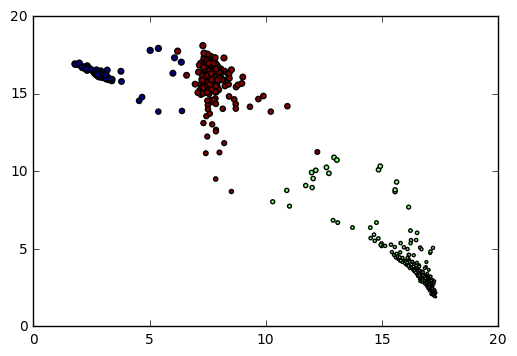

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.scatter(mp_distances[:,0],mp_distances[:,1], s=mp_distances[:,1], c=labels)
plt.show()

In [16]:
import numpy as np

extremism = mp_distances ** 3
extremism = np.sum(extremism, axis=1)
voting_record['extremism'] = extremism

voting_record = voting_record.sort_values('extremism', ascending=False)
print(voting_record.head(10))

      mpid               name                constituency         party  \
537  41264  Michael Tomlinson  Mid Dorset and North Poole  Conservative   
265  40980      Michael Ellis           Northampton North  Conservative   
425  41150       Edward Argar                   Charnwood  Conservative   
528  41255        Jeremy Quin                     Horsham  Conservative   
86   40795   Philip Hollobone                   Kettering  Conservative   
524  41251    James Cartlidge               South Suffolk  Conservative   
327  41047    Jacob Rees-Mogg         North East Somerset  Conservative   
387  41109      Tom Pursglove                       Corby  Conservative   
479  41205     Therese Coffey             Suffolk Coastal  Conservative   
3    40709   Justin Tomlinson               North Swindon  Conservative   

     32966  32965  32964  32958  32957  32956     ...       32109  32108  \
537    1.0    1.0    1.0    1.0    1.0    1.0     ...         1.0    1.0   
265    1.0    1.0    1

In [17]:
mp_distances = pd.DataFrame(mp_distances)
mp_distances['party'] = voting_record['party']
mp_distances['name'] = voting_record['name']
mp_distances = mp_distances.rename(columns={0:'rn', 1:'rw', 2:'lw'})
mp_distances.head()

,rn,rw,lw,party,name
0,8.147605,14.045634,5.597515,Labour,Bridget Phillipson
1,7.787820,16.212083,3.514355,Labour,Julie Elliott
2,7.529396,16.912198,3.155091,Labour,Sharon Hodgson
3,17.266059,2.292313,16.581693,Conservative,Justin Tomlinson
4,15.593272,4.458417,15.124785,Conservative,Justine Greening


In [18]:
# mp_distances['rn'] = mp_distances['rn']**-1
# mp_distances['rw'] = mp_distances['rw']**-1
# mp_distances['lw'] = mp_distances['lw']**-1
mp_distances.head()

,rn,rw,lw,party,name
0,8.147605,14.045634,5.597515,Labour,Bridget Phillipson
1,7.787820,16.212083,3.514355,Labour,Julie Elliott
2,7.529396,16.912198,3.155091,Labour,Sharon Hodgson
3,17.266059,2.292313,16.581693,Conservative,Justin Tomlinson
4,15.593272,4.458417,15.124785,Conservative,Justine Greening


In [19]:
mp_distances.corr()

,rn,rw,lw
rn,1.000000,-0.959083,0.916627
rw,-0.959083,1.000000,-0.979025
lw,0.916627,-0.979025,1.000000


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(mp_distances[['rn']], mp_distances['rw'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
predictions = lr.predict(mp_distances[['rn']])

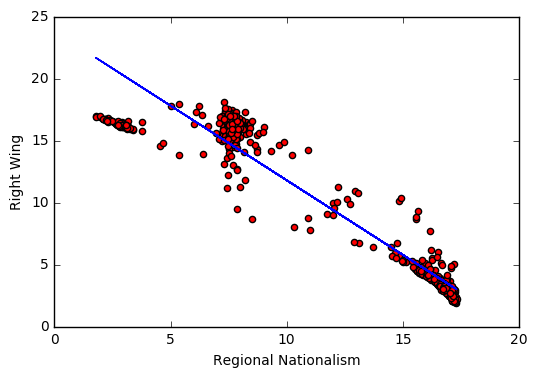

In [24]:
plt.scatter(mp_distances['rn'], mp_distances['rw'], c='r')
plt.plot(mp_distances['rn'], predictions)
plt.xlabel('Regional Nationalism')
plt.ylabel('Right Wing')
plt.show()

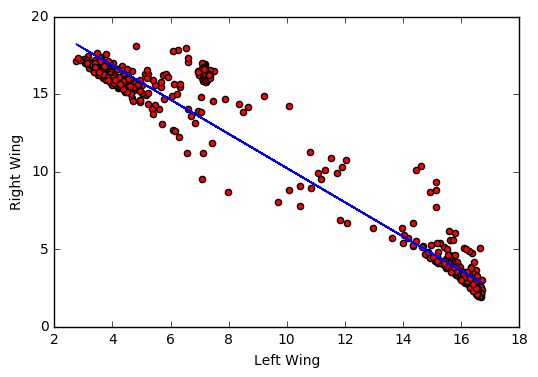

In [25]:
lr.fit(mp_distances[['lw']], mp_distances['rw'])
predictions = lr.predict(mp_distances[['lw']])
plt.scatter(mp_distances['lw'], mp_distances['rw'], c='r')
plt.plot(mp_distances['lw'], predictions, c='b')
# plt.xlim(0,18)
# plt.ylim(0,18)
# plt.axvline(6, c ='g')
# plt.axvline(14, c ='g')
# plt.axhline(6, c= 'g')
# plt.axhline(14, c= 'g')
plt.xlabel('Left Wing')
plt.ylabel('Right Wing')
plt.show()

In [26]:
moderates_filter = (mp_distances['lw']>=6) & (mp_distances['lw']<=14) & (mp_distances['rw']>=6) & (mp_distances['rw']<=15)
moderates = mp_distances[moderates_filter]

In [27]:
moderates['party'].value_counts()

Labour                                11
DUP                                    8
Conservative                           7
Scottish National Party                3
Independent                            3
Liberal Democrat                       3
UUP                                    2
UKIP                                   1
Social Democratic and Labour Party     1
Name: party, dtype: int64

In [38]:
labourcoop = voting_record[voting_record['party'] == 'Labour/Co-operative']
labour = voting_record[voting_record['party']=='Labour']
labour = pd.concat([labour, labourcoop])
labour = labour.reset_index(drop=True)
labour.tail()

,mpid,name,constituency,party,32966,32965,32964,32958,32957,32956,...,32109,32108,32106,32105,32104,32103,32107,32101,32100,extremism
223,40880,Mark Hendrick,Preston,Labour/Co-operative,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,1.0,0.5,0.0,0.0,4313.231623
224,41231,Luciana Berger,"Liverpool, Wavertree",Labour/Co-operative,0.5,0.5,0.5,0.5,0.5,0.5,...,0.0,0.0,0.0,0.0,0.5,1.0,0.5,0.0,0.0,4307.607103
225,40824,Mike Gapes,Ilford South,Labour/Co-operative,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,1.0,0.5,0.0,0.0,4301.260738
226,41221,Gareth Thomas,Harrow West,Labour/Co-operative,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.0,0.0,0.5,1.0,0.5,0.0,0.0,4283.883180
227,41194,John Woodcock,Barrow and Furness,Labour/Co-operative,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.5,0.5,1.0,0.5,0.0,0.0,4041.380768


In [40]:
kmeans_model_labour = KMeans(n_clusters=2, random_state=1)
labour_distances = kmeans_model_labour.fit_transform(labour.iloc[:,4:])
labour_labels = kmeans_model_labour.labels_
pd.crosstab(labour_labels, labour['party'])

party,Labour,Labour/Co-operative
row_0,,
0,146,17
1,58,7


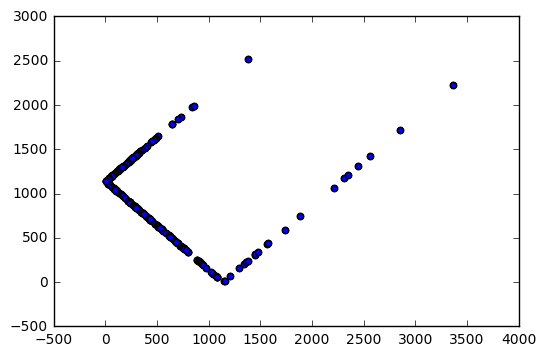

In [45]:
plt.scatter(labour_distances[:,0],labour_distances[:,1])
plt.show()

In [52]:
labour.sort_values(by='extremism', ascending=False)

,mpid,name,constituency,party,32966,32965,32964,32958,32957,32956,...,32109,32108,32106,32105,32104,32103,32107,32101,32100,extremism
0,41215,Dennis Skinner,Bolsover,Labour,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,1.0,0.5,0.0,0.0,6444.184358
204,41325,Rachael Maskell,York Central,Labour/Co-operative,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,1.0,0.5,0.0,0.0,5918.008061
1,41108,Daniel Zeichner,Cambridge,Labour,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,1.0,0.5,0.0,0.0,5899.522776
2,40998,Alan Campbell,Tynemouth,Labour,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,1.0,0.5,0.0,0.0,5794.240380
3,40810,Jim Cunningham,Coventry South,Labour,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,1.0,0.5,0.0,0.0,5768.884765
4,40834,Helen Hayes,Dulwich and West Norwood,Labour,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,1.0,0.5,0.0,0.0,5709.499710
5,41228,Liz McInnes,Heywood and Middleton,Labour,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,1.0,0.5,0.0,0.0,5708.054118
6,40978,Mary Glindon,North Tyneside,Labour,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,1.0,0.5,0.0,0.0,5570.562396
7,40997,Paul Blomfield,Sheffield Central,Labour,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,1.0,0.5,0.0,0.0,5557.187798
8,40985,Alan Whitehead,"Southampton, Test",Labour,0.5,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,1.0,0.5,0.0,0.0,5552.624165
